# **Install Package**

In [2]:
!pip install jcopml
!pip install luwiji

# **Import Libraries**

In [18]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.feature_importance import mean_score_decrease
from jcopml.plot import plot_missing_value
from jcopml.tuning import grid_search_params as gsp
from jcopml.plot import plot_confusion_matrix

# **Import Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Basic/Support Vector Machine (SVM)/Data/creditcard.csv')

# **Exploratory Data Analysis (EDA)**

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30492 entries, 0 to 30491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    30492 non-null  float64
 1   V1      30492 non-null  float64
 2   V2      30492 non-null  float64
 3   V3      30492 non-null  float64
 4   V4      30492 non-null  float64
 5   V5      30492 non-null  float64
 6   V6      30492 non-null  float64
 7   V7      30492 non-null  float64
 8   V8      30492 non-null  float64
 9   V9      30492 non-null  float64
 10  V10     30492 non-null  float64
 11  V11     30492 non-null  float64
 12  V12     30492 non-null  float64
 13  V13     30492 non-null  float64
 14  V14     30492 non-null  float64
 15  V15     30492 non-null  float64
 16  V16     30492 non-null  float64
 17  V17     30492 non-null  float64
 18  V18     30492 non-null  float64
 19  V19     30492 non-null  float64
 20  V20     30492 non-null  float64
 21  V21     30492 non-null  float64
 22

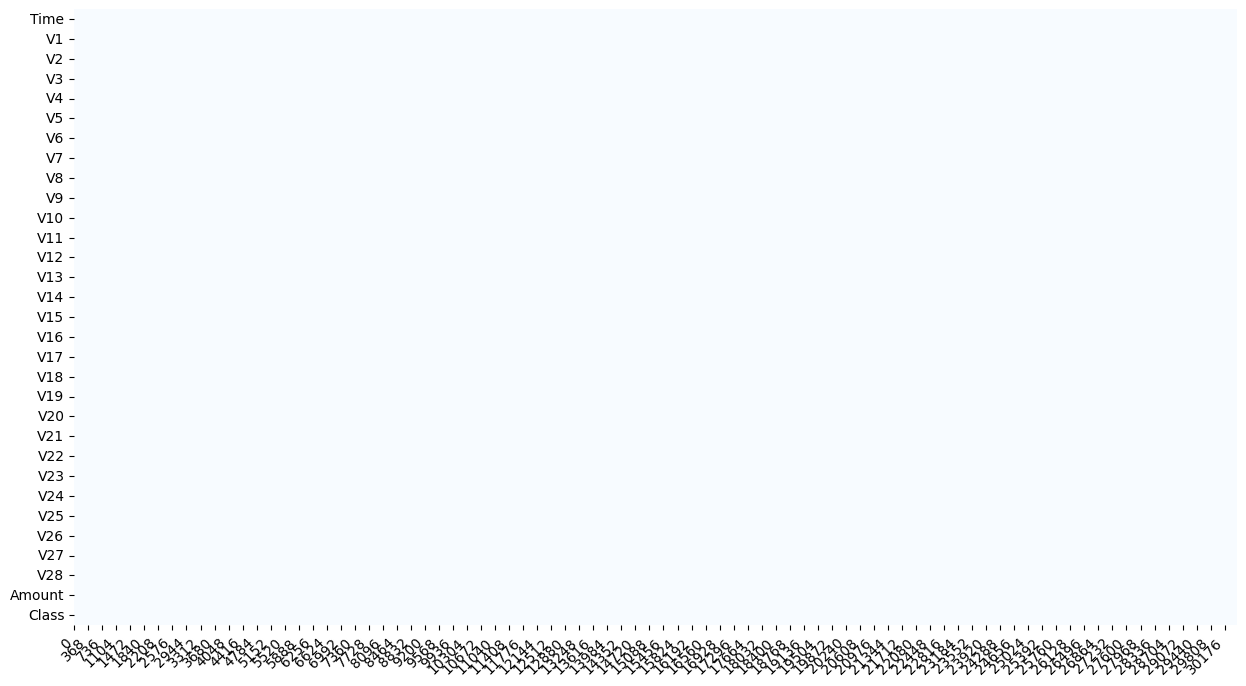

In [8]:
plot_missing_value(df)

# **Define Dependent & Independent Features**

In [9]:
X = df.drop(columns='Class')
y = df['Class']

# **Data Splitting**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

# **Training**

In [14]:
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [15]:
preprocessor = ColumnTransformer((
    ('numeric', num_pipe(scaling='standard'), X_train.columns),
))

pipeline = Pipeline((
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
))

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': np.float64(1000.0), 'algo__gamma': np.float64(0.001)}
0.999385069487148 0.9986471528717256 0.9996720773897361


**Note**

WOW 99% Test Score!!

Remember, every time you get a score that high, we should be suspecious and check again. Is there data leakage? Is the dataset imbalanced? Is the problem something simple? Let's check!

In [16]:
df.Class.value_counts()

,count
Class,
0,30000
1,492


We see the dataset is imbalanced, thats the problem.

By default, we should not use accuracy as a metric when the data is imbalanced. Use the F1-Score instead.

In [17]:
preprocessor = ColumnTransformer((
    ('numeric', num_pipe(scaling='standard'), X_train.columns),
))

pipeline = Pipeline((
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
))

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': np.float64(1000.0), 'algo__gamma': np.float64(0.001)}
0.9805950840879689 0.9574909514939499 0.9896907216494846


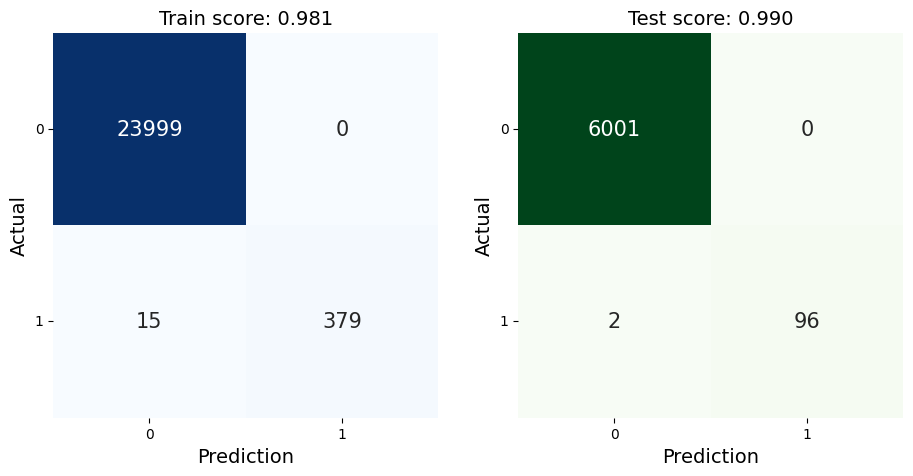

In [19]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)